
# Disney Movies and Box Office Success - Effect of Genres

# Introduction

# Question(s) of interests

In this analysis, I will be investigating few questions associated with the success of different Disney Movies.
Since the 1930s, Walt Disney Studios has released more than 600 films covering a wide range of genres.
I am interested in finding out how a movie genre impact its success?. I would like to also analyze on how different genres have performed over time.My guess is that certain genres would be more successful than others. 

The measure of success for my analysis will be how much income is generated by a specific genre

## Dataset description 

The data for this analysis were obtain from data.world  (https://data.world/kgarrett/disney-character-success-00-16) which follows a Creative Common Attribution 4.0 International License (https://creativecommons.org/licenses/by/4.0/).

The tables are:

disney-characters.csv
disney-director.csv
disney-voice-actors.csv
disney_movies_total_gross.csv
disney_revenue_1991-2016.csv

For my analysis, I will be using disney_movies_total_gross and characters tables formally described below:

* **disney_movies_total_gross.csv**
    * This file contains information on Disney Movies, including a unique ID number, the movie title, release date of the movie,genre of the movie, MPAA_rating,  total gross profit generated by that movie . The inflation_adjusted_gross is considered to be the metric that defines the box office success of a movie.
   

# Methods and Results

In [228]:
import pandas as pd 
import altair as alt
import numpy as np
import matplotlib.pyplot as plt 
from vega_datasets import data
#alt.renderers.enable('jupterlab')
alt.renderers.enable('png')

RendererRegistry.enable('png')

In [229]:
gross_income_df = pd.read_csv ('data/disney_movies_total_gross.csv',parse_dates = ['release_date'] )

In [230]:
gross_income_df.head(2)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000","$2,188,229,052"


Let us look at the dtypes of various columns contained in our data frame

In [231]:
gross_income_df.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
MPAA_rating                         object
total_gross                         object
inflation_adjusted_gross            object
dtype: object

 Converting the inflation_adjusted_gross to type int for our analysis

In [232]:
gross_income_df= gross_income_df.assign(inflation_adjusted_gross = gross_income_df['inflation_adjusted_gross'].str.strip('$').str.replace(',','').astype(int))
gross_income_df.head(1)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485",5228953251


The total number of genres contained in our data frame 

In [233]:
len(gross_income_df.genre.unique())

13

Let us sort the Data frame based on the Gross Profit , starting from Highest to Lowest to check if certain genres are more successful than others?

In [234]:
gross_income_df_sorted=gross_income_df.sort_values('inflation_adjusted_gross',ascending = False)
gross_income_df_sorted.head(2)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485",5228953251
1,Pinocchio,1940-02-09,Adventure,G,"$84,300,000",2188229052


# What were the genres of the top twenty box office successes?

Let us look at the first twenty movies to check if the box office success is distributed evenly on all genres or  if certain genres are more successful than others

In [235]:
gross_income_df_top20=gross_income_df_sorted.head(20)

In [236]:
len(gross_income_df_top20.genre.unique())

6

In [237]:
pd.DataFrame(gross_income_df_top20.genre.value_counts())

,genre
Adventure,10
Musical,3
Drama,2
Action,2
Comedy,2
Thriller/Suspense,1


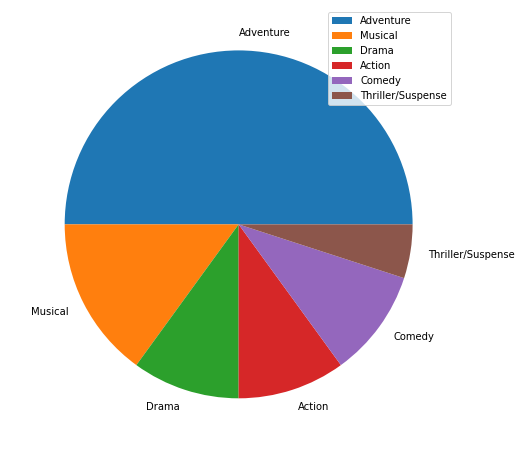

In [238]:
pd.DataFrame(gross_income_df_top20.genre.value_counts()).plot.pie(y = 'genre', figsize = (10,8), ylabel = ' ')
plt.show()

The top twenty movies(income generator) contain only six type of genres, furthermore, we can see that genre Adventure was most successful among the top twenty income generator. 

# How has the popularity of different genres changed over time?

* **Plotting the Mean Income genres generated by different Genres over time**

The above analysis shows that certain genres are more successful but When were those movies made? Has the popularity of
certain genres changed from year to year?

In [239]:
gross_income_df_top20_relyr = gross_income_df_top20[['genre','release_date']]

In [240]:
gross_income_df_top20_relyr['release_year']= gross_income_df_top20_relyr['release_date'].dt.year

<ipython-input-240-01e6ce01f598>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_income_df_top20_relyr['release_year']= gross_income_df_top20_relyr['release_date'].dt.year


In [241]:
gross_income_df_top20_relyr.head(2)

,genre,release_date,release_year
0,Musical,1937-12-21,1937
1,Adventure,1940-02-09,1940


In [242]:
gross_income_df_top20_relyr.groupby(['release_year'])['genre'].value_counts()

release_year  genre            
1937          Musical              1
1940          Adventure            1
              Musical              1
1946          Adventure            1
1950          Drama                1
1954          Adventure            1
1955          Drama                1
1961          Comedy               1
1967          Musical              1
1992          Comedy               1
1994          Adventure            1
1999          Thriller/Suspense    1
2003          Adventure            1
2006          Adventure            1
2010          Adventure            1
2012          Action               1
2015          Action               1
              Adventure            1
2016          Adventure            2
Name: genre, dtype: int64

A glance at the above table for top twenty income generator shows that although Musical were among the top income generators in 1930-1940, the Adventure seems to be the most popular in the recent past. How has the popularity of genres changed over time?

Let us consider the whole data frame instead of top 20 movies only for the purpose of our analysis and plot how the mean income generated over time

In [243]:
gross_income_df['release_year'] = gross_income_df['release_date'].dt.year
gross_income_df.head(1)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,"$184,925,485",5228953251,1937


In [244]:
gross_income_df_pop= gross_income_df [['genre','inflation_adjusted_gross','release_year']]

In [245]:
gross_income_df_genre_mean=gross_income_df_pop.groupby(['release_year','genre']).agg ({'inflation_adjusted_gross':['mean']})
gross_income_df_genre_mean.columns =gross_income_df_genre_mean.columns.droplevel(1)
gross_income_df_genre_mean = gross_income_df_genre_mean.reset_index (['release_year', 'genre'])
gross_income_df_genre_mean

,release_year,genre,inflation_adjusted_gross
0,1937,Musical,5.228953e+09
1,1940,Adventure,2.188229e+09
2,1940,Musical,2.187091e+09
3,1946,Adventure,1.078511e+09
4,1950,Drama,9.206087e+08
...,...,...,...
213,2016,Action,4.080843e+08
214,2016,Adventure,2.676026e+08
215,2016,Documentary,7.895708e+06
216,2016,Drama,1.071018e+07


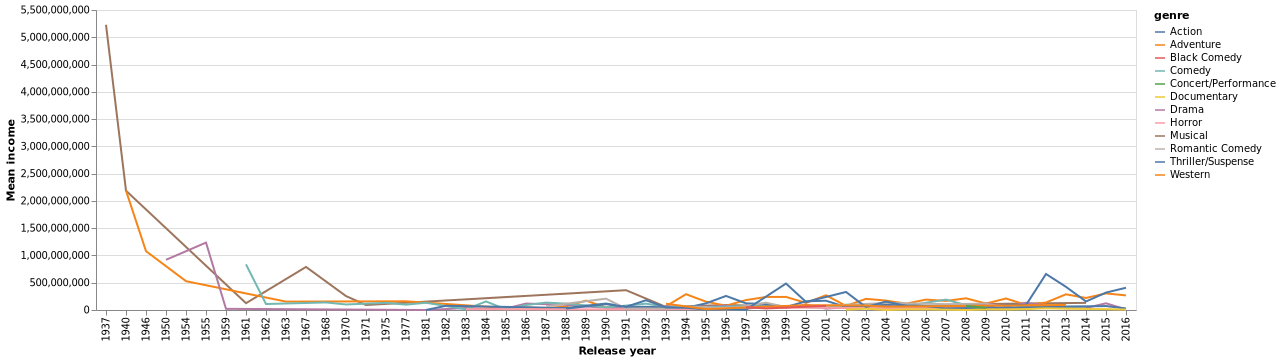

In [246]:
mean_income_ovr_yrs_plot =alt.Chart(gross_income_df_genre_mean).mark_line().encode(
    x=alt.X('release_year:O', title= 'Release year'),
    y= alt.Y('inflation_adjusted_gross:Q', title ='Mean income'),
    color='genre:N'
)
mean_income_ovr_yrs_plot.save('mean_income_ovr_yrs_plot.png')
mean_income_ovr_yrs_plot

As we can see that plotting the mean of the income generated by different genres over time is not very useful  but do seem to confirm that the Popularity of Genres have changed over time.

* **A better way to analyze the popularity of different genres is to analyze how the income contributed by different genres have changed over years?**

In [247]:
# Let us add a column that thell us how much is the total income generated by different genres
gross_income_df_pop['total_earnings_of_year'] =gross_income_df_pop.groupby(['release_year'])['inflation_adjusted_gross'].transform('sum')
gross_income_df_pop.head(5)

<ipython-input-247-23d62c93c384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_income_df_pop['total_earnings_of_year'] =gross_income_df_pop.groupby(['release_year'])['inflation_adjusted_gross'].transform('sum')


,genre,inflation_adjusted_gross,release_year,total_earnings_of_year
0,Musical,5228953251,1937,5228953251
1,Adventure,2188229052,1940,4375319860
2,Musical,2187090808,1940,4375319860
3,Adventure,1078510579,1946,1078510579
4,Drama,920608730,1950,920608730


In [248]:
# Let us look at the contribution of income generated by different genres
gross_income_df_pop['ratio_of_total_earning'] = 100*(gross_income_df_pop['inflation_adjusted_gross']/gross_income_df_pop['total_earnings_of_year'])
gross_income_df_pop.head(2)

<ipython-input-248-9ffdcc0a828b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_income_df_pop['ratio_of_total_earning'] = 100*(gross_income_df_pop['inflation_adjusted_gross']/gross_income_df_pop['total_earnings_of_year'])


,genre,inflation_adjusted_gross,release_year,total_earnings_of_year,ratio_of_total_earning
0,Musical,5228953251,1937,5228953251,100.000000
1,Adventure,2188229052,1940,4375319860,50.013008


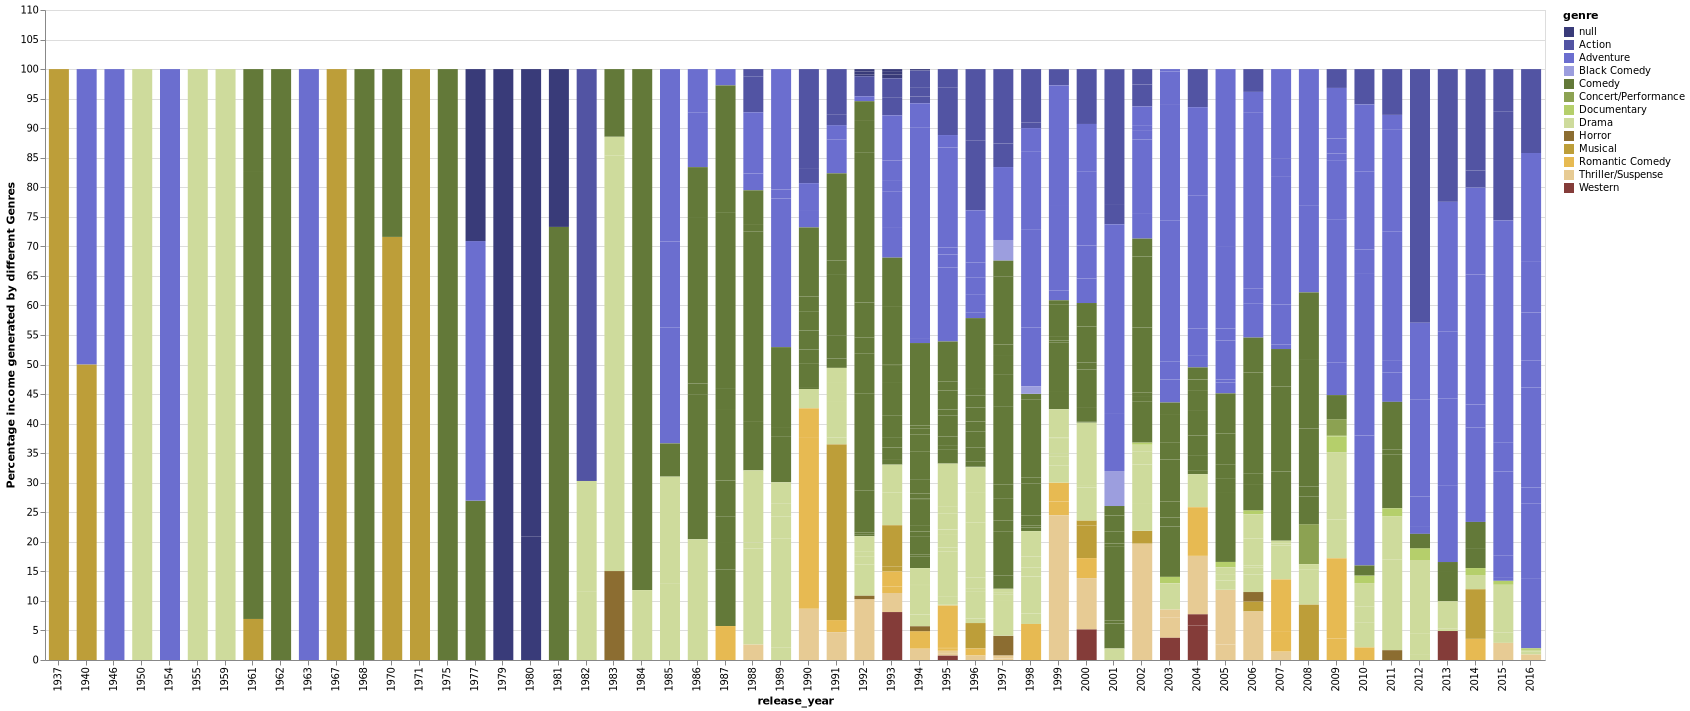

In [249]:
porp_income_plot_year =alt.Chart(gross_income_df_pop).mark_bar(size=20).encode(
    x='release_year:N',
    y=alt.Y('ratio_of_total_earning:Q',title ='Percentage income generated by different Genres'),
    color=alt.Color('genre:N', scale=alt.Scale(scheme='category20b'))
).properties( width=1500,
    height=650)
porp_income_plot_year.save('porp_income_plot_year.png')
porp_income_plot_year

The data is too granular and no clear trend can be seen, let us analyze the income contribution by different genres over different eras

* **How has the popularity of different genres is to analyze how the income contributed by different genres have changed over different eras?**

In [250]:
conditions = [(gross_income_df_pop.release_year <= 1950),
              ((gross_income_df_pop.release_year > 1950) & (gross_income_df_pop.release_year <= 1970)),
              ((gross_income_df_pop.release_year > 1970) & (gross_income_df_pop.release_year <= 1990)),
              ((gross_income_df_pop.release_year > 1990) & (gross_income_df_pop.release_year <= 2010)),
              (gross_income_df_pop.release_year > 2010)]
choices = ['1 - 30s and 40s','2 - 50s and 60s','3- 70s and 80s','4 - 90s and 2000s', '5 - 2010s and 2020s']
gross_income_df_pop['era'] = np.select(conditions, choices, default = 'none')
gross_income_df_pop

<ipython-input-250-4dfe6a806a71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_income_df_pop['era'] = np.select(conditions, choices, default = 'none')


,genre,inflation_adjusted_gross,release_year,total_earnings_of_year,ratio_of_total_earning,era
0,Musical,5228953251,1937,5228953251,100.000000,1 - 30s and 40s
1,Adventure,2188229052,1940,4375319860,50.013008,1 - 30s and 40s
2,Musical,2187090808,1940,4375319860,49.986992,1 - 30s and 40s
3,Adventure,1078510579,1946,1078510579,100.000000,1 - 30s and 40s
4,Drama,920608730,1950,920608730,100.000000,1 - 30s and 40s
...,...,...,...,...,...,...
574,Drama,12545979,2016,2873393105,0.436626,5 - 2010s and 2020s
575,Drama,8874389,2016,2873393105,0.308847,5 - 2010s and 2020s
576,Adventure,232532923,2016,2873393105,8.092625,5 - 2010s and 2020s
577,Adventure,246082029,2016,2873393105,8.564162,5 - 2010s and 2020s


In [251]:
gross_income_df_pop_era= gross_income_df_pop.groupby(['era','genre'])[['inflation_adjusted_gross']].sum().reset_index()
gross_income_df_pop_era.head(2)

,era,genre,inflation_adjusted_gross
0,1 - 30s and 40s,Adventure,3266739631
1,1 - 30s and 40s,Drama,920608730


In [252]:
gross_income_df_pop_era['total_earning_of_era'] = gross_income_df_pop_era.groupby(['era'])['inflation_adjusted_gross'].transform('sum')
gross_income_df_pop_era['ratio_of_total_earning'] = 100*(gross_income_df_pop_era['inflation_adjusted_gross']/gross_income_df_pop_era['total_earning_of_era'])

In [253]:
gross_income_df_pop_era.head(2)

,era,genre,inflation_adjusted_gross,total_earning_of_era,ratio_of_total_earning
0,1 - 30s and 40s,Adventure,3266739631,11603392420,28.153315
1,1 - 30s and 40s,Drama,920608730,11603392420,7.933962


In [254]:
# Let us sort values by era so we can chrongically see how the porportional contribution for each genre have 
# changed over eras
gross_income_df_pop_era = gross_income_df_pop_era.sort_values(by = 'era')
gross_income_df_pop_era.head(2)

,era,genre,inflation_adjusted_gross,total_earning_of_era,ratio_of_total_earning
0,1 - 30s and 40s,Adventure,3266739631,11603392420,28.153315
1,1 - 30s and 40s,Drama,920608730,11603392420,7.933962


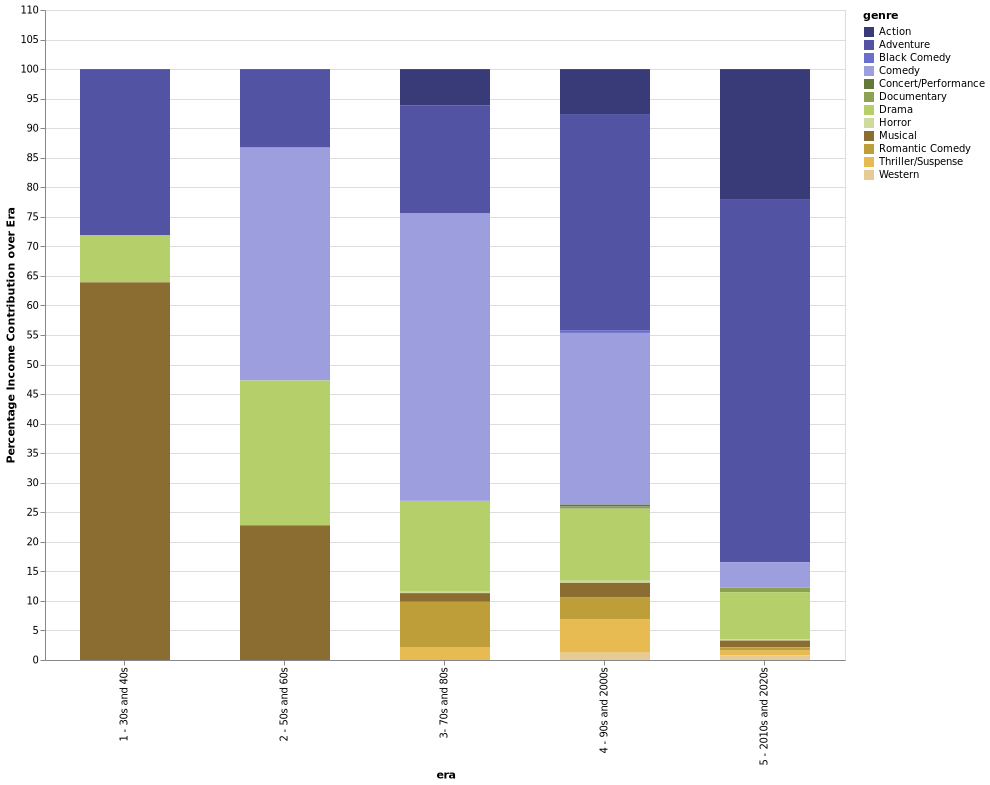

In [255]:
porp_income_plot_era=alt.Chart(gross_income_df_pop_era).mark_bar(size=90).encode(
    x='era:N',
    y=alt.Y('ratio_of_total_earning:Q',title ='Percentage Income Contribution over Era'),
#     color='genre:N'
    color=alt.Color('genre:N', scale=alt.Scale(scheme='category20b'))
).properties( width=800,
    height=650)
porp_income_plot_era.save('porp_income_plot_era.png')
porp_income_plot_era

# Insights:

* Musicals have gotten less popular.
* Action genre started gaining popularity in 70s and 80s and is now the  most popular genre
* Adventure has consistently been a popular category since the begining of this data set recording started

    

# Discussions

In this work, I analyzed the Disney Data set and concluded that certain Genres have been more successful than others. Based on my analysis, Disney should contiunue to make more movies having geners of Action and Adventure, as the latter has gain popularity whereas former has been a solid performer over years.



# References

Not all the work in this notebook is original. Some parts were borrowed from online resources. I take no credit for parts that are not mine. They were soley used for illustration purposes.However without mentioning any specific resources, let me thank all for making my journey of learning Data science (python), a fun.
